## Predicting Home Prices in Connecticut

In this project, we will be performing varies predictive modeling techniques to predict the 'Sale Amount' of homes in Connecticut in the future. 

We will train and analyze several predictive models for this task, including but not limited to:
* Linear Regression (Regression)
* Time Series (Forecasting)
* Neural Networks (Deep Learning)

### Motivation:

The uncertainty of the housing market is a major point of concern for the millennial and younger generations. Housing market prices are well above affordable levels for most people, with homes selling at much higher Sales Ratio than in the past. We are curious to see if trends can be found in this longitudinal data, which encompasses nearly 20 years of sale prices. This data was particularly of interest because it captures the previous  most recent housing market crash of 2008. We aim to teach our models the fluctuations between home prices and produce predictive outcomes for where the future of the housing market is headed based on the historical trends found. 

### The Data:

The data used in this project was sourced from the state of Connecticut via 
(data.ct.gov)['https://catalog.data.gov/dataset/real-estate-sales-2001-2018']. The data is free and open for public use. It contains Real Estate sells from 2001-2021.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/Real_Estate_Sales_2001-2021_GL.csv')

### Data Peeking:

In [3]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
3,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054159 entries, 0 to 1054158
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1054159 non-null  int64  
 1   List Year         1054159 non-null  int64  
 2   Date Recorded     1054157 non-null  object 
 3   Town              1054159 non-null  object 
 4   Address           1054108 non-null  object 
 5   Assessed Value    1054159 non-null  float64
 6   Sale Amount       1054159 non-null  float64
 7   Sales Ratio       1054159 non-null  float64
 8   Property Type     671713 non-null   object 
 9   Residential Type  660275 non-null   object 
 10  Non Use Code      302242 non-null   object 
 11  Assessor Remarks  161472 non-null   object 
 12  OPM remarks       11564 non-null    object 
 13  Location          254643 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 112.6+ MB


Looking at our dataset, we can see that most of the features are of type object, with the exception of 'Serial Number', 'List Year', 'Assessed Value', 'Sale Amount', and 'Sale Ratio'. We will need to perform some cateogrical imputing and other transformations for the rest of the features. 

We can also see that some columns are missing data. We will investigate and decide the best course of action on  this further.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial Number,1054159.0,502713.979454,7.230239e+06,0.0,30552.000000,80080.000000,160815.5000,2.000500e+09
List Year,1054159.0,2010.773798,6.540711e+00,2001.0,2004.000000,2011.000000,2017.0000,2.021000e+03
Assessed Value,1054159.0,279741.565349,1.650117e+06,0.0,88450.000000,139580.000000,227000.0000,8.815100e+08
Sale Amount,1054159.0,399028.642515,5.229758e+06,0.0,142200.000000,230000.000000,370000.0000,5.000000e+09
Sales Ratio,1054159.0,9.953241,1.838434e+03,0.0,0.481601,0.616289,0.7764,1.226420e+06


### Structuring Data
Because the date and dimmension of time matters in this project, let's update the data types for the 'Date Recorded' as type datetime64, and sort our dataframe by the date.

In [6]:
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054159 entries, 0 to 1054158
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Serial Number     1054159 non-null  int64         
 1   List Year         1054159 non-null  int64         
 2   Date Recorded     1054157 non-null  datetime64[ns]
 3   Town              1054159 non-null  object        
 4   Address           1054108 non-null  object        
 5   Assessed Value    1054159 non-null  float64       
 6   Sale Amount       1054159 non-null  float64       
 7   Sales Ratio       1054159 non-null  float64       
 8   Property Type     671713 non-null   object        
 9   Residential Type  660275 non-null   object        
 10  Non Use Code      302242 non-null   object        
 11  Assessor Remarks  161472 non-null   object        
 12  OPM remarks       11564 non-null    object        
 13  Location          254643 non-null   object

In [8]:
df[df['Date Recorded'] == '2021']

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
31164,200055,2020,2021-01-01,Old Lyme,12 SWAN AVE,150500.0,265000.0,0.5679,Residential,Single Family,NaN,NaN,NaN,NaN
43861,20259,2020,2021-01-01,Ridgefield,59 LINCOLN LANE,686500.0,985000.0,0.6969,Residential,Single Family,NaN,NaN,NaN,POINT (-73.47906 41.27457)


The other column we need to structure is 'Serial Number' and 'List Year' which are currently of int64 data type. We know that the 'Serial Number' feature represents the home ID and that it is not actually a measure of anything. Not changing this feature can impact the calculations and assumptions we make when performing EDA. We will be casting both of these columns as an object instead. 

In [9]:
cols_to_convert = ['List Year', 'Serial Number']

In [10]:
for col in cols_to_convert:
    df[col] = df[col].astype('str')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054159 entries, 0 to 1054158
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Serial Number     1054159 non-null  object        
 1   List Year         1054159 non-null  object        
 2   Date Recorded     1054157 non-null  datetime64[ns]
 3   Town              1054159 non-null  object        
 4   Address           1054108 non-null  object        
 5   Assessed Value    1054159 non-null  float64       
 6   Sale Amount       1054159 non-null  float64       
 7   Sales Ratio       1054159 non-null  float64       
 8   Property Type     671713 non-null   object        
 9   Residential Type  660275 non-null   object        
 10  Non Use Code      302242 non-null   object        
 11  Assessor Remarks  161472 non-null   object        
 12  OPM remarks       11564 non-null    object        
 13  Location          254643 non-null   object

Finally, let's sort our rows by the 'Date Recorded'

In [12]:
sorted_df = df.sort_values(by='Date Recorded')
display(sorted_df.head())
display(sorted_df.tail())

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
914857,170177,2017,1999-04-05,New London,184 PEQUOT AVE 309,46690.0,95000.0,0.491400,Condo,Condo,NaN,NaN,NaN,NaN
935392,173165,2017,2001-08-01,Shelton,19 BLACKBERRY LA,390810.0,635000.0,0.615449,Single Family,Single Family,NaN,NaN,NaN,NaN
939157,173202,2017,2001-08-23,Shelton,12 BOYSENBERRY LA,427910.0,558000.0,0.766864,Single Family,Single Family,NaN,NaN,NaN,NaN
446646,60626,2006,2001-09-04,Newington,110 MOYLAN CT,64750.0,88000.0,0.735795,Condo,Condo,NaN,NaN,NaN,POINT (-72.72554 41.7149)
487150,60631,2006,2001-09-05,Newington,48 EVERGREEN RD,166110.0,256000.0,0.648867,Single Family,Single Family,NaN,NaN,NaN,NaN


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
106131,211017,2021,2022-09-30,Norwich,3 SABRINAS CT,31400.0,22500.0,1.395556,Vacant Land,NaN,25 - Other,NaN,MULTIPLE PARCEL SALE,POINT (-72.102260022 41.571026508)
117871,211322,2021,2022-09-30,West Hartford,47 WOOD POND ROAD,271408.0,700000.0,0.387700,Residential,Single Family,NaN,NaN,NaN,POINT (-72.762313994 41.732406012)
123649,211386,2021,2022-09-30,West Haven,68 HOOD TER,38500.0,375000.0,0.102600,Vacant Land,NaN,NaN,NaN,NaN,POINT (-72.962475639 41.270609423)
234863,20280,2002,NaT,Orange,NaN,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
236356,0,2002,NaT,Orange,NaN,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


These transformations are enough for now as far as datatypes. Let's move on to cleaning our data. 

### Cleaning Data:

Determining the ratio of nulls in the data frame for each column. The columns 'OPM remarks', 'Assessor Remarks', 'Location', and 'Non Use Code' are missing over 70% of the entries. These columns will be dropped.

In [13]:
df.isna().sum()/len(df.index) * 100

Serial Number        0.000000
List Year            0.000000
Date Recorded        0.000190
Town                 0.000000
Address              0.004838
Assessed Value       0.000000
Sale Amount          0.000000
Sales Ratio          0.000000
Property Type       36.279726
Residential Type    37.364762
Non Use Code        71.328614
Assessor Remarks    84.682387
OPM remarks         98.903012
Location            75.843967
dtype: float64

#### Dropping features with a lot of missing values:

In [14]:
df.drop(['OPM remarks', 'Location', 'Assessor Remarks', 'Non Use Code'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054159 entries, 0 to 1054158
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Serial Number     1054159 non-null  object        
 1   List Year         1054159 non-null  object        
 2   Date Recorded     1054157 non-null  datetime64[ns]
 3   Town              1054159 non-null  object        
 4   Address           1054108 non-null  object        
 5   Assessed Value    1054159 non-null  float64       
 6   Sale Amount       1054159 non-null  float64       
 7   Sales Ratio       1054159 non-null  float64       
 8   Property Type     671713 non-null   object        
 9   Residential Type  660275 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 80.4+ MB


#### Checking for nulls and duplicate data

In [16]:
df.isna().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    393884
dtype: int64

In [17]:
df.isna().mean()

Serial Number       0.000000
List Year           0.000000
Date Recorded       0.000002
Town                0.000000
Address             0.000048
Assessed Value      0.000000
Sale Amount         0.000000
Sales Ratio         0.000000
Property Type       0.362797
Residential Type    0.373648
dtype: float64

#### Columns: 'Date Recorded' and 'Address'
**Dtype:** Object <br>
**Approach:** Row Drop

Looking at the missing values for 'Date Recorded' and 'Address', we see that missing values in this column are also missing values in other columns, some of which are really important. The combined missing values for both of these rows (2, 51 respectively) are less 60 rows. We will drop these using a custom function that automates the process.

In [18]:
date_and_address = ['Date Recorded', 'Address']

def drop_na(df, cols):
    '''
    Previews and drops na values 

    Inputs: 
    data = dataframe 
    col = column or list of columns in the dataframe of interest

    Outputs: 
    A peep of rows with missing values
    Drops na
    Sum of deleted rows 
    
    '''
    
    sum_list = []
    
    for col in cols:
        na_sum = df[col].isna().sum()
        sum_list.append(na_sum)
        print('-------------------------------------------------------------------------------------------------------------------------------------------')
        print(f'The number of empty rows for the {col} column is {na_sum}. Here are the rows:\n')
        display(df[df[col].isna()].head(3))
        df.dropna(subset=[col], inplace=True)
        
        sumL = sum(sum_list)
    print(f'In total {sumL} were succesfully dropped from the dataframe') 

In [19]:
drop_na(sorted_df, date_and_address)

-------------------------------------------------------------------------------------------------------------------------------------------
The number of empty rows for the Date Recorded column is 2. Here are the rows:



,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
234863,20280,2002,NaT,Orange,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
236356,0,2002,NaT,Orange,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


-------------------------------------------------------------------------------------------------------------------------------------------
The number of empty rows for the Address column is 49. Here are the rows:



,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
149638,10640,2001,2001-12-19,Bridgeport,NaN,2106020.0,45000.0,46.800444,NaN,NaN,25.0,NaN,NaN,NaN
145969,10537,2001,2002-02-05,Hartford,NaN,0.0,120000.0,0.000000,NaN,NaN,16.0,NaN,NaN,NaN
263008,30125,2003,2003-11-10,New Milford,NaN,55090.0,400000.0,0.137725,NaN,NaN,7.0,NaN,NaN,POINT (-73.41375 41.57871)


In total 51 were succesfully dropped from the dataframe


In [20]:
sorted_df.isna().sum()

Serial Number             0
List Year                 0
Date Recorded             0
Town                      0
Address                   0
Assessed Value            0
Sale Amount               0
Sales Ratio               0
Property Type        382399
Residential Type     393837
Non Use Code         751914
Assessor Remarks     892637
OPM remarks         1042544
Location             799470
dtype: int64

In [21]:
help(drop_na)

Help on function drop_na in module __main__:

drop_na(df, cols)
    Previews and drops na values 
    
    Inputs: 
    data = dataframe 
    col = column or list of columns in the dataframe of interest
    
    Outputs: 
    A peep of rows with missing values
    Drops na
    Sum of deleted rows



In [22]:

# def drop_dups()


We have officially discarded those data points with missing values for 'Address' and 'Date Recorded' and that concludes the cleaning process for these features. 

#### Columns: 'Property Type' and 'Residential Type'
**Dtype:** Object <br>
**Approach:** Mode Imputing

We are missing quite a few values for 'Property Type' and 'Residential Type' so we can't simply drop these missing values at the risk of losing a lot of data. These features are of object type, so we can impute the missing values by the mode. 

In [23]:
sorted_df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
914857,170177,2017,1999-04-05,New London,184 PEQUOT AVE 309,46690.0,95000.0,0.491400,Condo,Condo,NaN,NaN,NaN,NaN
935392,173165,2017,2001-08-01,Shelton,19 BLACKBERRY LA,390810.0,635000.0,0.615449,Single Family,Single Family,NaN,NaN,NaN,NaN
939157,173202,2017,2001-08-23,Shelton,12 BOYSENBERRY LA,427910.0,558000.0,0.766864,Single Family,Single Family,NaN,NaN,NaN,NaN
446646,60626,2006,2001-09-04,Newington,110 MOYLAN CT,64750.0,88000.0,0.735795,Condo,Condo,NaN,NaN,NaN,POINT (-72.72554 41.7149)
487150,60631,2006,2001-09-05,Newington,48 EVERGREEN RD,166110.0,256000.0,0.648867,Single Family,Single Family,NaN,NaN,NaN,NaN


In [24]:
df['Property Type'].value_counts()

Property Type
Single Family     401612
Residential       112099
Condo             105420
Two Family         26408
Three Family       12586
Vacant Land         5746
Commercial          4208
Four Family         2150
Apartments           943
Industrial           533
Public Utility         8
Name: count, dtype: int64

In [25]:
def plot_unique_vals(data, col, title, x_label, y_label):
    '''
    Plots the unique values of each column. 
    Takes in data, col, title, x_label, and y_label as variables:

    Inputs: 
    data = dataframe 
    col = column in the dataframe of interest
    title = title of the plot
    x_label = x axis label of the plot
    y_label = y axis label of the plot 

    Outputs: 
    A bar plot of the unique values in column 
    
    '''
    fig = sns.barplot(data[col].value_counts(), orient='h').set_title(title)
    # add additional title, xlabel and ylabel variables

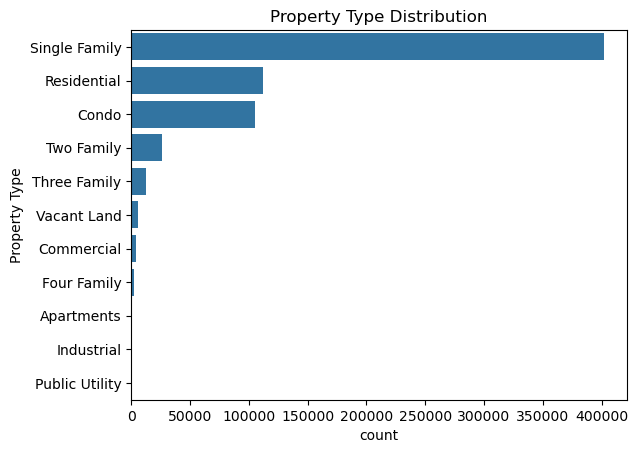

In [26]:
plot_unique_vals(df, 'Property Type', 'Property Type Distribution', 'Property Type', 'Count')

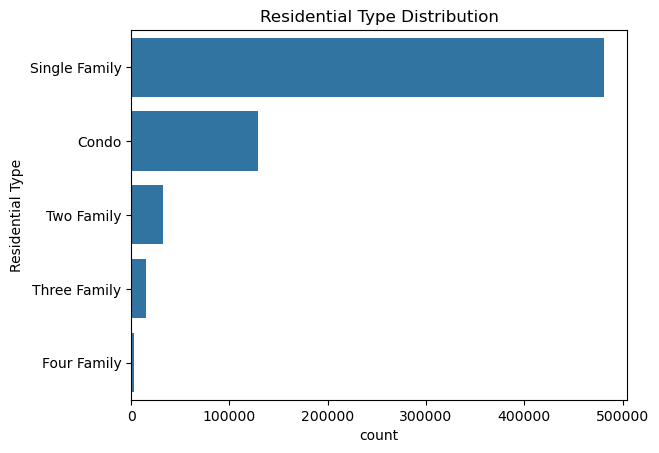

In [27]:
plot_unique_vals(df, 'Residential Type', 'Residential Type Distribution', 'Residential Type', 'Count');

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054159 entries, 0 to 1054158
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Serial Number     1054159 non-null  object        
 1   List Year         1054159 non-null  object        
 2   Date Recorded     1054157 non-null  datetime64[ns]
 3   Town              1054159 non-null  object        
 4   Address           1054108 non-null  object        
 5   Assessed Value    1054159 non-null  float64       
 6   Sale Amount       1054159 non-null  float64       
 7   Sales Ratio       1054159 non-null  float64       
 8   Property Type     671713 non-null   object        
 9   Residential Type  660275 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 80.4+ MB
